In [1]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

Text(0, 0.5, 'TruncatedSVD Component2')

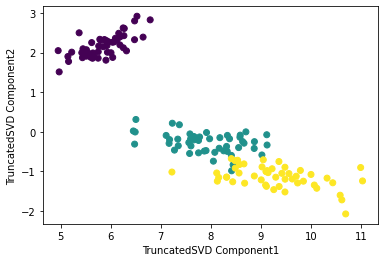

In [7]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD Component1')
plt.ylabel('TruncatedSVD Component2')

어느정도 클러스터링이 되고 있는 것을 확인할 수 있다.

데이터를 스케일링하고 TruncatedSVD 와 PCA 와 비교해 보겠다.

Text(0.5, 1.0, 'PCA Transformed')

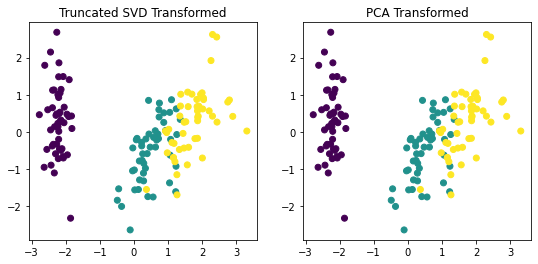

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1,ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

TruncatedSVD 와 PCA 클래스 모두 SVD 를 이용해 행렬을 분해하므로 두개의 변환 행렬 값과 원복 속성별 컴포넌트 비율 값이 거의 같은것을 볼수 있다.

In [12]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3406508213123326e-15
0.0


데이터 스케일링으로 데이터 중심이 동일해지면 SVD 와 PCA는 동일한 변환을 수행한다.